In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df=pd.read_csv(r'C:\Users\HP\Downloads\Zomato data .csv')
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [15]:

def handlerate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)


In [17]:
df['rate']=df['rate'].apply(handlerate)
print(df.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [19]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB



# highest order from restaurant

Text(0.5, 0, 'types of resturent')

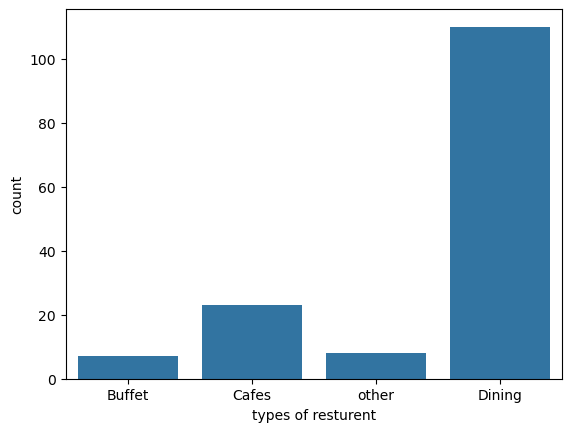

In [21]:

sns.countplot(x=df['listed_in(type)'])
plt.xlabel('types of resturent')

# votes recived by restaurant

Text(0, 0.5, 'votes')

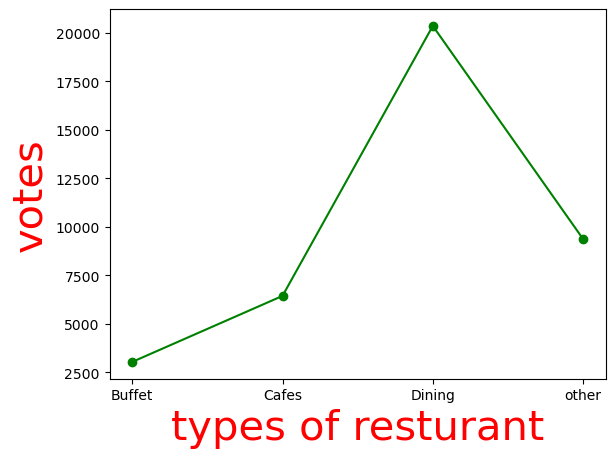

In [23]:
group_data=df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({"votes": group_data})
plt.plot(result,c='green',marker='o')
plt.xlabel('types of resturant',c='red',size=30)
plt.ylabel('votes',c='red',size=30)

              
# highest rating resturent

Text(0.5, 1.0, 'Average Rating per Restaurant Type')

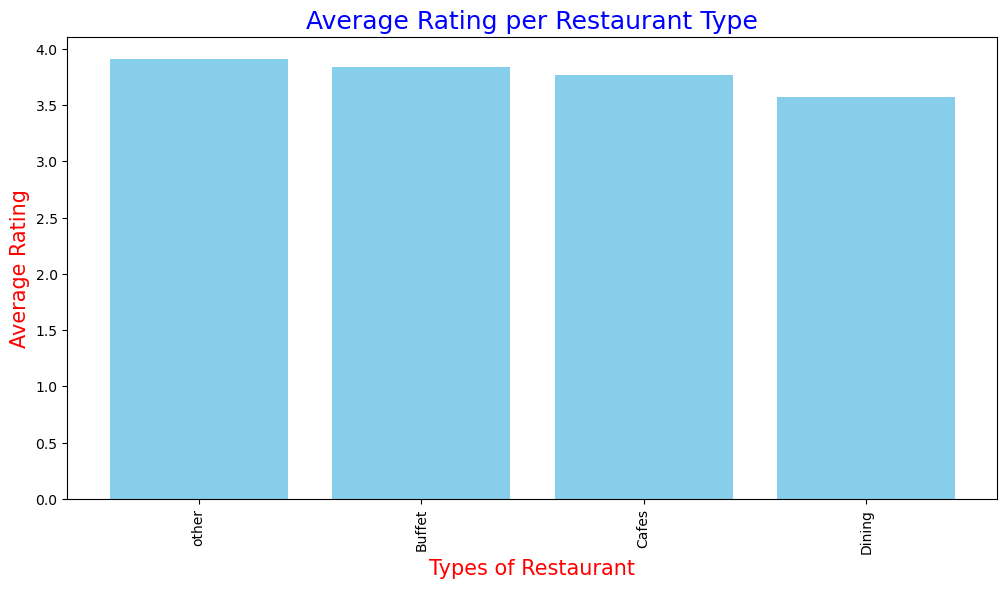

In [27]:
grouped = df.groupby('listed_in(type)')['rate'].mean()
grouped = grouped.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(grouped.index, grouped.values, color='skyblue')
plt.xlabel('Types of Restaurant', color='red', fontsize=15)
plt.ylabel('Average Rating', color='red', fontsize=15)
plt.xticks(rotation=90)
plt.title('Average Rating per Restaurant Type', fontsize=18, color='blue')


# avg money spent by two peoples

Text(0, 0.5, 'count')

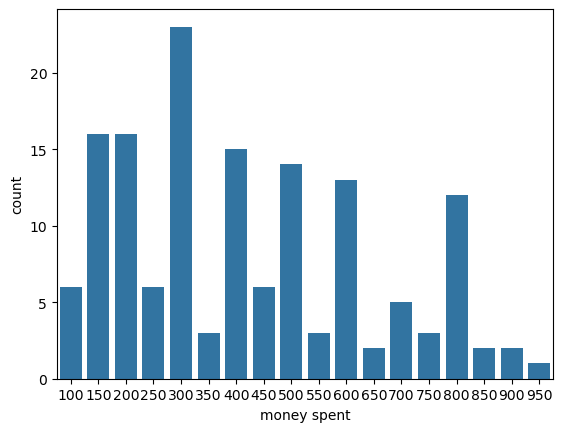

In [29]:
sns.countplot(x=df['approx_cost(for two people)'])
plt.xlabel('money spent')
plt.ylabel('count')

# order anaysis offline or online

<Axes: xlabel='online_order', ylabel='rate'>

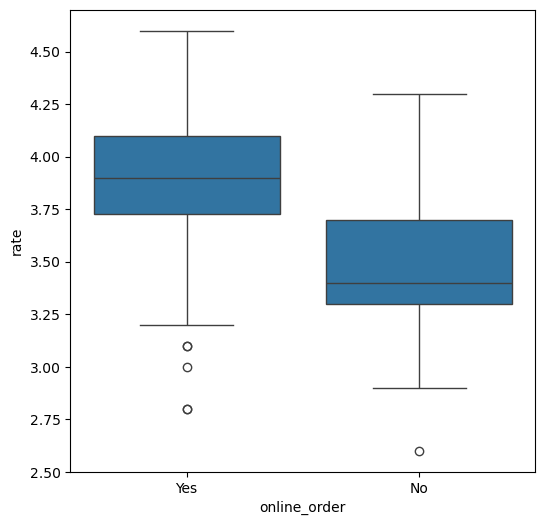

In [31]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)